# Statistical Machine Learning 
## Self Assessment 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 4

In [81]:
P = 0.4
ALPHA = 0.05

def simulate_bernoulli(n_range=(1,10000),n_simul=100,p=P, alpha=ALPHA, simulate=True):
    def compute_epsilon(n,alpha):
        epsilon = np.sqrt(np.log(2/alpha)/(2*n))
        return epsilon
    results = []
    lengths = []
    bound = 1-alpha
    for n in range(n_range[0],n_range[1]):
        n_contained = 0
        epsilon = compute_epsilon(n=n,alpha=alpha)
        tmp_lengths = []
        for i in range(n_simul):
            N = np.random.binomial(n=n,p=p)
            contain = (N/n-epsilon)<=p and (N/n+epsilon)>=p 
            tmp_lengths.append(np.abs( epsilon)*2)
            if contain:
                n_contained += 1
        lengths.append(np.average(tmp_lengths))
        results.append( n_contained/n)
    return results, lengths

results, lengths=simulate_bernoulli()


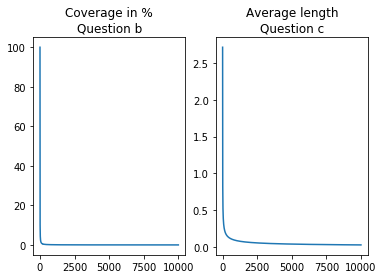

In [82]:
plt.figure()
plt.subplot(121),plt.plot(range(1,10000),results),plt.title('Coverage in %\nQuestion b')
plt.subplot(122),plt.plot(range(1,10000),lengths),plt.title('Average length\nQuestion c')
plt.show()

### Problem 9

In [16]:
A = np.array([[-2, 2, 2, -2, 0],
              [-3, 3, 3, -3, 0],
              [2, -2, -2, -2, 0],
             [0, 0, 0, 0, 2],
             [0, 0, 0, 0, 2]])
print(A.shape)
print("rank(A)={}".format(np.linalg.matrix_rank(A)))
u,v, s = np.linalg.svd(A)
print("U={0},\nV={1},\nS={2}".format(u,v,s))

(5, 5)
rank(A)=3
U=[[-5.23361762e-01 -1.83806348e-01  0.00000000e+00  8.32050294e-01
   0.00000000e+00]
 [-7.85042643e-01 -2.75709522e-01  0.00000000e+00 -5.54700196e-01
   0.00000000e+00]
 [ 3.31361606e-01 -9.43503835e-01  0.00000000e+00 -1.78547252e-16
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  7.07106781e-01  0.00000000e+00
  -7.07106781e-01]
 [ 0.00000000e+00  0.00000000e+00  7.07106781e-01  0.00000000e+00
   7.07106781e-01]],
V=[7.55414623e+00 3.30679222e+00 2.82842712e+00 6.64786218e-17
 0.00000000e+00],
S=[[ 5.38058775e-01 -5.38058775e-01 -5.38058775e-01  3.62599315e-01
   0.00000000e+00]
 [-2.09346812e-01  2.09346812e-01  2.09346812e-01  9.31945136e-01
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00]
 [ 3.24551235e-01 -4.86569412e-01  8.11120647e-01  3.01317673e-16
   0.00000000e+00]
 [ 7.49221704e-01  6.55680467e-01  9.35412378e-02 -8.07984160e-17
   0.00000000e+00]]


### Problem 10

To decompose $x$ with as linear combination of $p_1$, $p_2$, $p_3$ and $x_e$, we first compute the orthogonal basis of the span of $p_1$, $p_2$, $p_3$.
This is done using the following numpy function which returns a QR factorization of a matrix:
```python 
np.linalg.qr
``` 
$Q$ columns generate an orthogonal basis for the columns of the inputed matrix. $R$ is an upper triangular matrix. I input a $(4,3)$ matrix built with $p_1$, $p_2$ and $p_3$ as columns.
Then, I project $x$ on the computed basis and subtract the result to $x$. Finally we have $x=x_e+x^*$ with $x_e$ orthogonal to $x^*$

In [81]:
def gram_schmidt(X):
    return np.linalg.qr(X)[0]

C=np.array([[1, 9, 3],
  [2, -2, 4],
  [3,-6,-2],
  [4, -7,1]])

X = np.array([1, 5, 3, 7])
base = gram_schmidt(C)


print("p1_ort = {0},  p2_ort={1},\np3_ort={2}".format(base[:,0], base[:,1], base[:,2]))


def project_on_base(v=X):
    base = gram_schmidt(C)
    c1,c2,c3 = np.dot(base[:,0],X),np.dot(base[:,1],X),np.dot(base[:,2],X)
    return c1*base[:,0],c2*base[:,1],c3*base[:,2]
x_star = np.sum(project_on_base(), axis=0)
print("x* = {}".format(x_star))
x_e = X-x_star
assert (x_e + x_star == X).all()
assert np.dot(x_e,x_star) <= 10**(-14) 
print("x_e = {}".format(x_e))

p1_ort = [-0.18257419 -0.36514837 -0.54772256 -0.73029674],  p2_ort=[ 0.97106927  0.068693   -0.17797733 -0.14363082],
p3_ort=[-0.15173033  0.79816935 -0.57846266  0.0726949 ]
x* = [0.985281   5.26984835 3.32872435 6.62221231]
x_e = [ 0.014719   -0.26984835 -0.32872435  0.37778769]
